In [2]:
#work horses of tables (dataframe) and arrays
import pandas as pd
import numpy as np

# Machine Learning Algorithm

import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn.feature_selection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Test and train dataset split
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
import io
import os
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,classification_report, confusion_matrix
%matplotlib inline
sns.set()


# switch off pandas warning 
pd.options.mode.chained_assignment = None

# used to write the model to a file
from sklearn.externals import joblib

In [4]:
#data is a dataframe 
#for undetectable missing values
missing_values = ["n/a", "?"," ."]

# Read the Donor Raw Data_ML with Python.csv file here
dataset = pd.read_csv('Donor Raw Data_ML with Python.csv', na_values = missing_values)

In [5]:
dataset.sample(20)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
14428,0,NaN,144539,89,69.0,0,U,1.0,2.0,H,...,7.0,10.0,3.0,6.0,6,13,17,89,5.76,11
17400,0,NaN,172866,65,52.0,0,T,1.0,35.0,H,...,16.0,21.0,5.0,20.0,6,13,18,57,15.33,4
7956,1,10.0,79850,77,83.0,0,R,2.0,46.0,U,...,7.0,10.0,3.0,10.0,5,12,16,67,5.86,3
7389,0,NaN,73959,29,57.0,0,R,2.0,43.0,H,...,0.0,25.0,25.0,25.0,4,10,23,23,25.00,1
3564,0,NaN,34783,65,57.0,0,T,2.0,37.0,H,...,15.0,20.0,5.0,15.0,6,13,18,65,11.80,3
4391,1,15.0,43235,65,NaN,0,C,2.0,28.0,U,...,6.0,16.0,10.0,16.0,6,12,21,64,12.80,4
10061,0,NaN,100693,137,57.0,0,U,3.0,8.0,U,...,22.0,32.0,10.0,20.0,6,12,24,121,20.17,9
18152,0,NaN,180351,137,64.0,0,C,1.0,24.0,U,...,15.0,18.0,3.0,18.0,6,14,16,130,10.37,12
3952,1,10.0,38580,113,61.0,0,S,2.0,20.0,H,...,20.0,25.0,5.0,20.0,5,10,26,113,14.82,7
362,0,NaN,3318,41,63.0,1,S,3.0,21.0,H,...,5.0,10.0,5.0,10.0,7,29,15,44,7.67,2


In [6]:
dataset.shape

(19372, 50)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19372 entries, 0 to 19371
Data columns (total 50 columns):
TARGET_B                       19372 non-null int64
TARGET_D                       4843 non-null float64
CONTROL_NUMBER                 19372 non-null int64
MONTHS_SINCE_ORIGIN            19372 non-null int64
DONOR_AGE                      14577 non-null float64
IN_HOUSE                       19372 non-null int64
URBANICITY                     18918 non-null object
SES                            18918 non-null float64
CLUSTER_CODE                   18918 non-null float64
HOME_OWNER                     19372 non-null object
DONOR_GENDER                   19372 non-null object
INCOME_GROUP                   14980 non-null float64
PUBLISHED_PHONE                19372 non-null int64
OVERLAY_SOURCE                 19372 non-null object
MOR_HIT_RATE                   19372 non-null int64
WEALTH_RATING                  10562 non-null float64
MEDIAN_HOME_VALUE              19372 non-nul

In [8]:
dataset.duplicated().sum()

0

In [9]:
dataset.head(10)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,URBANICITY,SES,CLUSTER_CODE,HOME_OWNER,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
0,0,NaN,5,101,87.0,0,NaN,NaN,NaN,H,...,15.0,20.0,5.0,15.0,5,12,26,92,8.49,7
1,1,10.0,12,137,79.0,0,R,2.0,45.0,H,...,20.0,25.0,5.0,17.0,7,21,7,122,14.72,12
2,0,NaN,37,113,75.0,0,S,1.0,11.0,H,...,23.0,28.0,5.0,19.0,11,32,6,105,16.75,16
3,0,NaN,38,92,NaN,0,U,2.0,4.0,H,...,14.0,17.0,3.0,15.0,11,33,6,92,11.76,12
4,0,NaN,41,101,74.0,0,R,2.0,49.0,U,...,20.0,25.0,5.0,25.0,6,19,18,92,8.83,3
5,0,NaN,52,101,63.0,0,U,3.0,8.0,U,...,7.0,10.0,3.0,10.0,9,20,19,91,5.82,6
6,0,NaN,53,89,71.0,0,R,3.0,50.0,H,...,15.0,20.0,5.0,20.0,7,18,21,91,11.00,8
7,1,5.0,67,89,79.0,0,C,2.0,28.0,H,...,4.0,7.0,3.0,5.0,9,24,9,91,5.05,8
8,0,NaN,70,89,41.0,0,C,3.0,30.0,H,...,4.0,7.0,3.0,5.0,11,25,17,91,5.03,14
9,1,16.0,71,101,63.0,0,R,2.0,43.0,H,...,8.0,11.0,3.0,8.0,11,27,9,91,6.82,13


In [120]:
dataset.sample(10).transpose()

,9927,9011,14356,15761,10096,8948,7213,11438,16504,12768
TARGET_B,N,N,N,N,N,N,N,N,N,N
TARGET_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONTROL_NUMBER,99382,90110,143703,157300,101029,89649,71982,114362,164545,127751
MONTHS_SINCE_ORIGIN,125,41,29,41,65,113,125,89,77,17
DONOR_AGE,67,35,67,79,62,43,73,72,59,69
IN_HOUSE,0,0,0,0,0,0,0,0,0,0
URBANICITY,U,U,U,S,T,S,R,R,C,T
SES,5,3,3,1,2,2,3,2,1,3
CLUSTER_CODE,NaN,9,9,13,39,18,51,49,24,41
HOME_OWNER,H,H,U,U,U,U,U,U,H,H


In [12]:
dataset.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

In [13]:
dataset.isna().sum()

TARGET_B                           0
TARGET_D                       14529
CONTROL_NUMBER                     0
MONTHS_SINCE_ORIGIN                0
DONOR_AGE                       4795
IN_HOUSE                           0
URBANICITY                       454
SES                              454
CLUSTER_CODE                     454
HOME_OWNER                         0
DONOR_GENDER                       0
INCOME_GROUP                    4392
PUBLISHED_PHONE                    0
OVERLAY_SOURCE                     0
MOR_HIT_RATE                       0
WEALTH_RATING                   8810
MEDIAN_HOME_VALUE                  0
MEDIAN_HOUSEHOLD_INCOME            0
PCT_OWNER_OCCUPIED                 0
PER_CAPITA_INCOME                  0
PCT_ATTRIBUTE1                     0
PCT_ATTRIBUTE2                     0
PCT_ATTRIBUTE3                     0
PCT_ATTRIBUTE4                     0
PEP_STAR                           0
RECENT_STAR_STATUS                 0
RECENCY_STATUS_96NK                0
F

In [14]:
dataset.describe()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,IN_HOUSE,SES,CLUSTER_CODE,INCOME_GROUP,PUBLISHED_PHONE,...,LIFETIME_GIFT_RANGE,LIFETIME_MAX_GIFT_AMT,LIFETIME_MIN_GIFT_AMT,LAST_GIFT_AMT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT,FILE_AVG_GIFT,FILE_CARD_GIFT
count,19372.000000,4843.000000,19372.000000,19372.000000,14577.000000,19372.000000,18918.000000,18918.000000,14980.000000,19372.000000,...,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000,19372.000000
mean,0.250000,15.624344,96546.225377,73.409973,58.919051,0.073198,1.903425,27.861613,3.907543,0.497729,...,11.587876,19.208808,7.620932,16.584199,5.367128,12.901869,18.191152,69.482088,12.858338,5.273591
std,0.433024,12.445137,55830.643871,41.255574,16.669382,0.260469,0.749215,14.451392,1.864796,0.500008,...,15.116893,16.101128,7.959786,11.977558,1.264205,4.642072,4.033065,37.568169,8.787758,4.607063
min,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,4.000000,15.000000,1.360000,0.000000
25%,0.000000,10.000000,48289.000000,29.000000,47.000000,0.000000,1.000000,15.000000,2.000000,0.000000,...,5.000000,12.000000,3.000000,10.000000,5.000000,11.000000,16.000000,33.000000,8.000000,2.000000
50%,0.000000,13.000000,96937.000000,65.000000,60.000000,0.000000,2.000000,28.000000,4.000000,0.000000,...,10.000000,16.000000,5.000000,15.000000,6.000000,12.000000,18.000000,65.000000,11.200000,4.000000
75%,0.250000,20.000000,145429.500000,113.000000,73.000000,0.000000,2.000000,40.000000,5.000000,1.000000,...,15.000000,21.000000,10.000000,20.000000,6.000000,13.000000,20.000000,105.000000,15.000000,8.000000
max,1.000000,200.000000,191779.000000,137.000000,87.000000,1.000000,4.000000,53.000000,7.000000,1.000000,...,997.000000,1000.000000,450.000000,450.000000,17.000000,64.000000,27.000000,260.000000,450.000000,41.000000


In [15]:
dataset.DONOR_AGE.mean()

58.91905055909995

In [16]:
dataset.MONTHS_SINCE_LAST_PROM_RESP.mean()

19.038899926801214

In [17]:
dataset.MONTHS_SINCE_LAST_PROM_RESP.fillna('19', inplace = True)

In [20]:
median_age = dataset['DONOR_AGE'].mode()

print('median age', median_age)

median age 0    67.0
dtype: float64


In [21]:
dataset.DONOR_AGE.fillna('67', inplace = True)

In [22]:
mode_incomegroup = dataset['INCOME_GROUP'].mode()


print('Mode', mode_incomegroup)

Mode 0    5.0
dtype: float64


In [25]:
dataset.INCOME_GROUP.fillna('5', inplace = True)

In [525]:
#dataset['DONOR_GENDER'].replace('F',0, inplace = True)
#dataset['DONOR_GENDER'].replace('M',1, inplace = True)

In [26]:
#Replace " ? " with " U " - Unknown
dataset.URBANICITY.fillna('U', inplace = True)

In [141]:
#check
dataset.groupby('SES').size()

SES
1.0    5924
2.0    9284
3.0    3323
4.0     387
5.0     454
dtype: int64

In [27]:
mode_ses = dataset['SES'].mode()
print('SES_mode', mode_ses)

SES_mode 0    2.0
dtype: float64


In [122]:
dataset.groupby('CLUSTER_CODE').size()

CLUSTER_CODE
1.0     239
2.0     380
3.0     300
4.0     113
5.0     199
6.0     123
7.0     184
8.0     378
9.0     153
10.0    387
11.0    484
12.0    631
13.0    579
14.0    454
15.0    223
16.0    384
17.0    349
18.0    619
19.0     98
20.0    317
21.0    353
22.0    251
23.0    293
24.0    795
25.0    273
26.0    202
27.0    666
28.0    343
29.0    170
30.0    519
31.0    249
32.0    152
33.0    109
34.0    284
35.0    727
36.0    716
37.0    204
38.0    240
39.0    512
40.0    830
41.0    431
42.0    284
43.0    468
44.0    383
45.0    482
46.0    369
47.0    185
48.0    180
49.0    675
50.0    156
51.0    460
52.0     60
53.0    303
dtype: int64

In [126]:
dataset.CLUSTER_CODE.mode()

0    40.0
dtype: float64

In [142]:
dataset.CLUSTER_CODE.fillna(40, inplace = True)

In [143]:
#1=yes, 0=no
dataset['TARGET_B'].replace(1,'Y', inplace = True)
dataset['TARGET_B'].replace(0,'N', inplace = True)


In [144]:
dataset.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'IN_HOUSE', 'URBANICITY', 'SES', 'CLUSTER_CODE',
       'HOME_OWNER', 'DONOR_GENDER', 'INCOME_GROUP', 'PUBLISHED_PHONE',
       'OVERLAY_SOURCE', 'MOR_HIT_RATE', 'WEALTH_RATING', 'MEDIAN_HOME_VALUE',
       'MEDIAN_HOUSEHOLD_INCOME', 'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME',
       'PCT_ATTRIBUTE1', 'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4',
       'PEP_STAR', 'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'FREQUENCY_STATUS_97NK', 'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM', 'LIFETIME_PROM',
       'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT',
       'LIFETIME_GIFT_RANGE', 'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT',
       'LAST_GIFT_AMT', 'CARD_PROM_12', 'NUMBER

In [146]:
gender_cat = pd.get_dummies(dataset, columns = ['DONOR_GENDER'], drop_first = True)
gender_cat.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
TARGET_B,N,Y,N,N,N,N,N,Y,N,Y,N,N,N,N,Y,N,Y,N,N,N
TARGET_D,NaN,10,NaN,NaN,NaN,NaN,NaN,5,NaN,16,NaN,NaN,NaN,NaN,3,NaN,12,NaN,NaN,NaN
CONTROL_NUMBER,5,12,37,38,41,52,53,67,70,71,77,113,122,139,142,156,159,162,186,210
MONTHS_SINCE_ORIGIN,101,137,113,92,101,101,89,89,89,101,113,113,89,101,137,125,77,65,125,101
DONOR_AGE,87,79,75,67,74,63,71,79,41,63,67,67,67,67,67,73,81,76,67,69
IN_HOUSE,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
URBANICITY,U,R,S,U,R,U,R,C,C,R,R,R,R,R,R,U,R,S,U,S
SES,5,2,1,2,2,3,3,2,3,2,2,3,1,2,2,5,2,2,5,2
CLUSTER_CODE,830,45,11,4,49,8,50,28,30,43,43,53,42,46,43,830,45,20,830,16
HOME_OWNER,H,H,H,H,U,U,H,H,H,H,U,U,U,U,U,U,U,U,U,H


In [157]:
new_dataset = pd.get_dummies(dataset, columns = ['DONOR_GENDER',  'INCOME_GROUP'
                                                ,'URBANICITY', 'PUBLISHED_PHONE'
                                                ,'FREQUENCY_STATUS_97NK', 'HOME_OWNER'
                                                , 'IN_HOUSE', 'SES'], drop_first = True)

In [158]:
new_dataset.head()

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,CLUSTER_CODE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,...,PUBLISHED_PHONE_1,FREQUENCY_STATUS_97NK_2,FREQUENCY_STATUS_97NK_3,FREQUENCY_STATUS_97NK_4,HOME_OWNER_U,IN_HOUSE_1,SES_2.0,SES_3.0,SES_4.0,SES_5.0
0,N,NaN,5,101,87,830.0,P,0,NaN,554,...,0,0,0,0,0,0,0,0,0,1
1,Y,10.0,12,137,79,45.0,P,0,3.0,334,...,0,1,0,0,0,0,1,0,0,0
2,N,NaN,37,113,75,11.0,P,0,9.0,2388,...,0,0,1,0,0,0,0,0,0,0
3,N,NaN,38,92,67,4.0,B,0,4.0,1688,...,1,0,1,0,0,0,1,0,0,0
4,N,NaN,41,101,74,49.0,B,8,5.0,514,...,1,0,0,0,1,0,1,0,0,0


In [159]:
new_dataset.shape

(19372, 66)

In [160]:
new_dataset.columns.values

array(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'CLUSTER_CODE', 'OVERLAY_SOURCE', 'MOR_HIT_RATE',
       'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1',
       'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR',
       'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK',
       'RECENT_RESPONSE_PROP', 'RECENT_AVG_GIFT_AMT',
       'RECENT_CARD_RESPONSE_PROP', 'RECENT_AVG_CARD_GIFT_AMT',
       'RECENT_RESPONSE_COUNT', 'RECENT_CARD_RESPONSE_COUNT',
       'MONTHS_SINCE_LAST_PROM_RESP', 'LIFETIME_CARD_PROM',
       'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT', 'LIFETIME_GIFT_COUNT',
       'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
       'DONOR_GEN

In [162]:
feature_columns = new_dataset[['CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'MOR_HIT_RATE',
       'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1',
       'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR',
       'RECENT_STAR_STATUS', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
       'DONOR_GENDER_F', 'DONOR_GENDER_M', 'DONOR_GENDER_U',
       'INCOME_GROUP_2.0', 'INCOME_GROUP_3.0', 'INCOME_GROUP_4.0',
       'INCOME_GROUP_5.0', 'INCOME_GROUP_6.0', 'INCOME_GROUP_7.0',
       'INCOME_GROUP_5', 'URBANICITY_R', 'URBANICITY_S', 'URBANICITY_T',
       'URBANICITY_U', 'PUBLISHED_PHONE_1', 'FREQUENCY_STATUS_97NK_2',
       'FREQUENCY_STATUS_97NK_3', 'FREQUENCY_STATUS_97NK_4', 'HOME_OWNER_U',
       'IN_HOUSE_1','SES_2.0', 'SES_3.0', 'SES_4.0', 'SES_5.0']]

In [163]:
feature_columns.head().transpose()

,0,1,2,3,4
CONTROL_NUMBER,5,12,37,38,41
MONTHS_SINCE_ORIGIN,101,137,113,92,101
DONOR_AGE,87,79,75,67,74
MOR_HIT_RATE,0,0,0,0,8
MEDIAN_HOME_VALUE,554,334,2388,1688,514
MEDIAN_HOUSEHOLD_INCOME,294,212,405,153,328
PCT_OWNER_OCCUPIED,76,72,63,3,90
PER_CAPITA_INCOME,11855,10385,30855,16342,12107
PCT_ATTRIBUTE1,0,0,0,0,0
PCT_ATTRIBUTE2,0,41,25,25,33


In [164]:
cn_col = dataset[['CONTROL_NUMBER']]
cn_col.head()

,CONTROL_NUMBER
0,5
1,12
2,37
3,38
4,41


In [165]:
feature_columns.isnull().sum()

CONTROL_NUMBER                 0
MONTHS_SINCE_ORIGIN            0
DONOR_AGE                      0
MOR_HIT_RATE                   0
MEDIAN_HOME_VALUE              0
MEDIAN_HOUSEHOLD_INCOME        0
PCT_OWNER_OCCUPIED             0
PER_CAPITA_INCOME              0
PCT_ATTRIBUTE1                 0
PCT_ATTRIBUTE2                 0
PCT_ATTRIBUTE3                 0
PCT_ATTRIBUTE4                 0
PEP_STAR                       0
RECENT_STAR_STATUS             0
RECENT_RESPONSE_PROP           0
RECENT_AVG_GIFT_AMT            0
RECENT_CARD_RESPONSE_PROP      0
RECENT_AVG_CARD_GIFT_AMT       0
RECENT_RESPONSE_COUNT          0
RECENT_CARD_RESPONSE_COUNT     0
MONTHS_SINCE_LAST_PROM_RESP    0
LIFETIME_CARD_PROM             0
LIFETIME_PROM                  0
LIFETIME_GIFT_AMOUNT           0
LIFETIME_GIFT_COUNT            0
LIFETIME_AVG_GIFT_AMT          0
LIFETIME_GIFT_RANGE            0
LIFETIME_MAX_GIFT_AMT          0
LIFETIME_MIN_GIFT_AMT          0
LAST_GIFT_AMT                  0
CARD_PROM_

In [166]:
target_col = ['TARGET_B']
target = dataset[target_col]
target.head()

,TARGET_B
0,N
1,Y
2,N
3,N
4,N


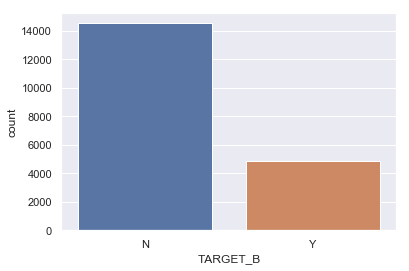

In [167]:
sns.countplot(x='TARGET_B',data=dataset);

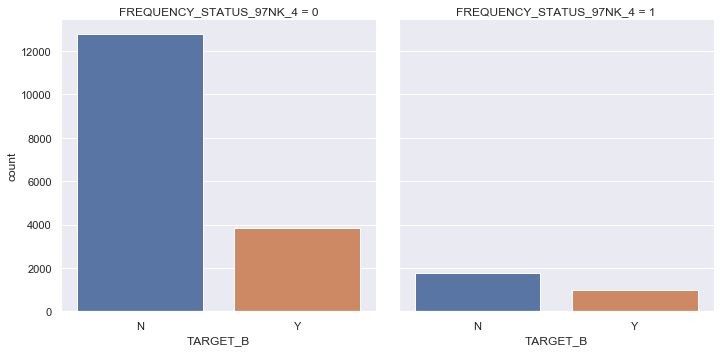

In [43]:
sns.factorplot(x='TARGET_B', col='FREQUENCY_STATUS_97NK_4', kind='count', data=new_dataset ).set_xticklabels(rotation=0);

In [168]:
K_Best=sklearn.feature_selection.SelectKBest(k=8)
selected_features=K_Best.fit(feature_columns,target)
indices_selected=selected_features.get_support(indices=True)
chosen_cols=[feature_columns.columns[i] for i in indices_selected]

In [169]:
chosen_cols

['PEP_STAR',
 'RECENT_RESPONSE_PROP',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'LIFETIME_GIFT_COUNT',
 'FILE_CARD_GIFT',
 'FREQUENCY_STATUS_97NK_4']

In [170]:
X = new_dataset[chosen_cols]

In [171]:
X.sample(3)

,PEP_STAR,RECENT_RESPONSE_PROP,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,LIFETIME_GIFT_COUNT,FILE_CARD_GIFT,FREQUENCY_STATUS_97NK_4
12418,0,0.200,0.429,3,3,3,3,0
10820,0,0.105,0.222,2,2,3,2,0
18599,1,0.200,0.333,4,3,10,8,0


In [172]:
y = target['TARGET_B']

In [173]:
y.head()

0    N
1    Y
2    N
3    N
4    N
Name: TARGET_B, dtype: object

In [266]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=72)

In [191]:
X_train.shape

(15497, 8)

In [192]:
X_test.shape

(3875, 8)

In [193]:
y_train.shape

(15497,)

In [194]:
y_test.shape

(3875,)

In [285]:
#modelling with random forest

randForest = RandomForestClassifier(n_estimators=50, min_samples_split=50, max_depth=7, 
                                    max_features=1)

In [286]:
randForest.fit(X_train,y_train.values)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [287]:
y_pred_RF  = randForest.predict(X_test)

In [288]:
randForestScore = accuracy_score(y_test,y_pred_RF)

In [289]:
print("The Random forest accuraccy score is:", randForestScore)

The Random forest accuraccy score is: 0.7612903225806451


In [239]:
pd.crosstab(y_test, y_pred_RF, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,2949,6
Y,916,4


In [189]:
# Testing Accuracy
print(accuracy_score(y_test, y_pred_RF))
print(confusion_matrix(y_test, y_pred_RF))
print(classification_report(y_test, y_pred_RF))

0.7620645161290323
[[2949    6]
 [ 916    4]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86      2955
           Y       0.40      0.00      0.01       920

   micro avg       0.76      0.76      0.76      3875
   macro avg       0.58      0.50      0.44      3875
weighted avg       0.68      0.76      0.66      3875



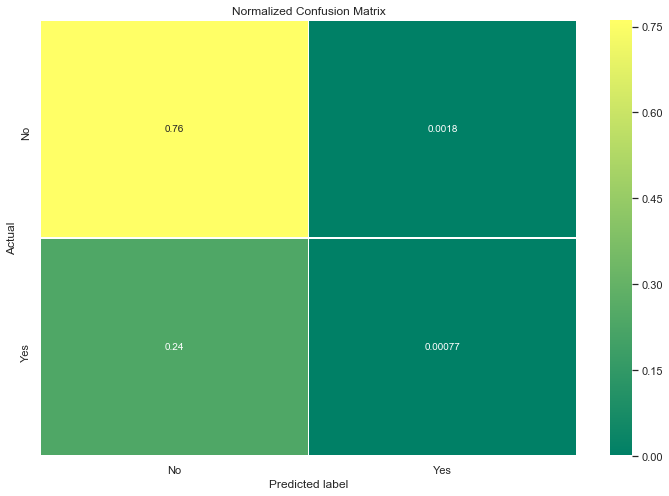

In [62]:
conf_m = confusion_matrix(y_test, y_pred_RF)
cf_mat_p = conf_m/conf_m.sum()

plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix")
plt.show()

In [278]:
#modellimg with logistic regression

from sklearn.linear_model import LogisticRegression


In [279]:
logReg = LogisticRegression()

In [280]:
logReg.fit(X_train,y_train.values)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [281]:
logReg_predict =logReg.predict(X_test)

In [282]:
# Predicted Probabilities
probabilities = logReg.predict_proba(X_test)

In [283]:
# show the first 3 rows
probabilities[:3]

array([[0.78988678, 0.21011322],
       [0.77599505, 0.22400495],
       [0.77579432, 0.22420568]])

In [293]:
accuracy_score(y_test,logReg_predict)

0.7623225806451613

In [70]:
pd.crosstab(y_test,logReg_predict, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,2945,10
Y,911,9


In [72]:
print(accuracy_score(y_test,logReg_predict))
print(confusion_matrix(y_test,logReg_predict))
print(classification_report(y_test,logReg_predict))

0.7623225806451613
[[2945   10]
 [ 911    9]]
              precision    recall  f1-score   support

           N       0.76      1.00      0.86      2955
           Y       0.47      0.01      0.02       920

   micro avg       0.76      0.76      0.76      3875
   macro avg       0.62      0.50      0.44      3875
weighted avg       0.69      0.76      0.66      3875



In [84]:
#modelling with KneighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn = KNeighborsClassifier(n_neighbors =5)

In [86]:
knn.fit(X_train,y_train.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [87]:
KNN_pred = knn.predict(X_test)

In [88]:
accuracy_score(y_test,KNN_pred)

0.7096774193548387

In [89]:
pd.crosstab(y_test,KNN_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,2632,323
Y,802,118


In [90]:
print(accuracy_score(y_test,KNN_pred))
print(confusion_matrix(y_test,KNN_pred))
print(classification_report(y_test,KNN_pred))

0.7096774193548387
[[2632  323]
 [ 802  118]]
              precision    recall  f1-score   support

           N       0.77      0.89      0.82      2955
           Y       0.27      0.13      0.17       920

   micro avg       0.71      0.71      0.71      3875
   macro avg       0.52      0.51      0.50      3875
weighted avg       0.65      0.71      0.67      3875



In [93]:
#modelling with Decision Tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [94]:
DecTree = tree.DecisionTreeClassifier(max_depth=10,max_features=4 )

In [95]:
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [96]:
DecTree_pred = DecTree.predict(X_test)

In [97]:
accuracy_score(y_test,DecTree_pred)

0.7421935483870967

In [98]:
pd.crosstab(y_test,DecTree_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,2819,136
Y,863,57


In [294]:
print('KNN : ',accuracy_score(y_test,KNN_pred)  )
print('Log_Reg: ', accuracy_score(y_test,logReg_predict))
print('R_Forest: ',accuracy_score(y_test,y_pred_RF))
print('Decision_Forest: ', accuracy_score(y_test,DecTree_pred))

KNN :  0.7096774193548387
Log_Reg:  0.7623225806451613
R_Forest:  0.7612903225806451
Decision_Forest:  0.7421935483870967


In [321]:
# CossValidation

validation_size = 0.20
seed = 9
scoring = 'accuracy'

In [322]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, 
                                                                                random_state=seed,stratify=y)

In [323]:
models = []
models.append(('LR_cv', LogisticRegression()))
models.append(('KNN_cv', KNeighborsClassifier()))
models.append(('RF_cv', RandomForestClassifier()))
models.append(('DT_cv', DecisionTreeClassifier()))

In [324]:
results = []
names = []
for name, model in models:
       
    kfold = model_selection.KFold(n_splits=10, random_state=seed)

    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR_cv: 0.749178 (0.009021)
KNN_cv: 0.711945 (0.010329)
RF_cv: 0.696781 (0.011047)
DT_cv: 0.674066 (0.009140)


In [306]:
LR_cv = LogisticRegression()
LR_cv.fit(X_train, Y_train)

LR_cv_pred = LR_cv.predict(X_validation)
print(accuracy_score(Y_validation, LR_cv_pred))
print(confusion_matrix(Y_validation, LR_cv_pred))
print(classification_report(Y_validation, LR_cv_pred))

0.7478709677419355
[[2892   14]
 [ 963    6]]
              precision    recall  f1-score   support

           N       0.75      1.00      0.86      2906
           Y       0.30      0.01      0.01       969

   micro avg       0.75      0.75      0.75      3875
   macro avg       0.53      0.50      0.43      3875
weighted avg       0.64      0.75      0.64      3875



In [326]:
print( LR_cv.predict_proba(X_validation))

[[0.7767611  0.2232389 ]
 [0.81202043 0.18797957]
 [0.73967885 0.26032115]
 ...
 [0.72927513 0.27072487]
 [0.78786302 0.21213698]
 [0.75648024 0.24351976]]


In [325]:
pd.crosstab(Y_validation,LR_cv_pred, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,N,Y
Actual,,
N,2892,14
Y,963,6


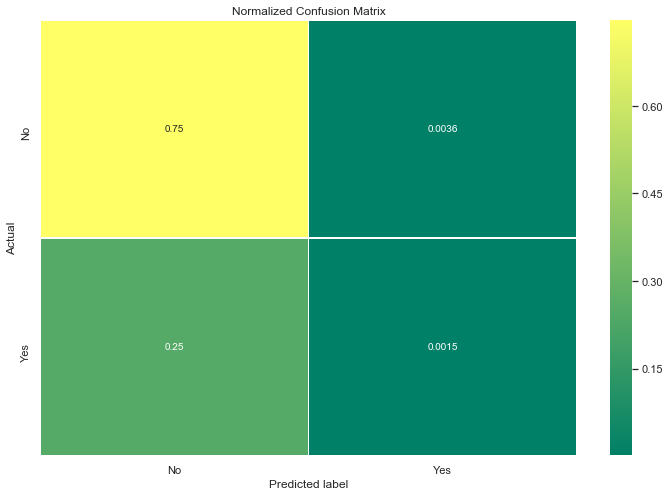

In [327]:
conf_m = confusion_matrix(Y_validation, LR_cv_pred)
cf_mat_p = conf_m/conf_m.sum()

plt.figure(figsize=(12,8))
sns.heatmap(cf_mat_p, annot=True, linewidths=.5, cmap=cm.summer,xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted label')
plt.title("Normalized Confusion Matrix")
plt.show()

In [328]:
#Using best Modelto Predict Prospective Donor

#for undetectable missing values
missing_values = ["n/a", "?"," ."]

# Read the Donor Raw Data_ML with Python.csv file here
pros_data = pd.read_csv('Prospective Donor_ML with Python.csv', na_values = missing_values)

In [329]:
pros_data.shape

(2148, 48)

In [346]:
pros_data.head(2).transpose()

,0,1
CONTROL_NUMBER,139,142
MONTHS_SINCE_ORIGIN,101,137
DONOR_AGE,59,59
IN_HOUSE,0,0
URBANICITY,R,R
SES,2,2
CLUSTER_CODE,46,43
HOME_OWNER,U,U
DONOR_GENDER,F,F
INCOME_GROUP,5,NaN


In [331]:
pros_data.isnull().sum()

CONTROL_NUMBER                    0
MONTHS_SINCE_ORIGIN               0
DONOR_AGE                       529
IN_HOUSE                          0
URBANICITY                       54
SES                              54
CLUSTER_CODE                     54
HOME_OWNER                        0
DONOR_GENDER                      0
INCOME_GROUP                    481
PUBLISHED_PHONE                   0
OVERLAY_SOURCE                    0
MOR_HIT_RATE                      0
WEALTH_RATING                  1006
MEDIAN_HOME_VALUE                 0
MEDIAN_HOUSEHOLD_INCOME           0
PCT_OWNER_OCCUPIED                0
PER_CAPITA_INCOME                 0
PCT_ATTRIBUTE1                    0
PCT_ATTRIBUTE2                    0
PCT_ATTRIBUTE3                    0
PCT_ATTRIBUTE4                    0
PEP_STAR                          0
RECENT_STAR_STATUS                0
RECENCY_STATUS_96NK               0
FREQUENCY_STATUS_97NK             0
RECENT_RESPONSE_PROP              0
RECENT_AVG_GIFT_AMT         

In [332]:
pros_data.DONOR_AGE.median()

59.0

In [333]:
pros_data.groupby('SES').size()

SES
1.0     617
2.0    1071
3.0     354
4.0      52
dtype: int64

In [ ]:
pros_data.DONOR_AGE.fillna(59, inplace = True)
pros_data.URBANICITY.fillna('U', inplace = True)
pros_data.URBANICITY.fillna(5.0, inplace = True)
pros_data.CLUSTER_CODE.fillna(pros_data.CLUSTER_CODE.mode(), inplace = True)
pros_data.INCOME_GROUP.fillna(pros_data.INCOME_GROUP.mode(), inplace = True)

In [347]:
#pros_data.drop(['WEALTH_RATING', 'TARGET_D'], axis = 1, inplace = True)


In [348]:
pros_datanew = pd.get_dummies(dataset, columns = ['DONOR_GENDER',  'INCOME_GROUP'
                                                ,'URBANICITY', 'PUBLISHED_PHONE'
                                                ,'FREQUENCY_STATUS_97NK', 'HOME_OWNER'
                                                , 'IN_HOUSE', 'SES'], drop_first = True)

In [349]:
pros_datanew.head(4)

,TARGET_B,TARGET_D,CONTROL_NUMBER,MONTHS_SINCE_ORIGIN,DONOR_AGE,CLUSTER_CODE,OVERLAY_SOURCE,MOR_HIT_RATE,WEALTH_RATING,MEDIAN_HOME_VALUE,...,PUBLISHED_PHONE_1,FREQUENCY_STATUS_97NK_2,FREQUENCY_STATUS_97NK_3,FREQUENCY_STATUS_97NK_4,HOME_OWNER_U,IN_HOUSE_1,SES_2.0,SES_3.0,SES_4.0,SES_5.0
0,N,NaN,5,101,87,830.0,P,0,NaN,554,...,0,0,0,0,0,0,0,0,0,1
1,Y,10.0,12,137,79,45.0,P,0,3.0,334,...,0,1,0,0,0,0,1,0,0,0
2,N,NaN,37,113,75,11.0,P,0,9.0,2388,...,0,0,1,0,0,0,0,0,0,0
3,N,NaN,38,92,67,4.0,B,0,4.0,1688,...,1,0,1,0,0,0,1,0,0,0


In [338]:
pros_datanew.columns

Index(['TARGET_B', 'TARGET_D', 'CONTROL_NUMBER', 'MONTHS_SINCE_ORIGIN',
       'DONOR_AGE', 'CLUSTER_CODE', 'OVERLAY_SOURCE', 'MOR_HIT_RATE',
       'WEALTH_RATING', 'MEDIAN_HOME_VALUE', 'MEDIAN_HOUSEHOLD_INCOME',
       'PCT_OWNER_OCCUPIED', 'PER_CAPITA_INCOME', 'PCT_ATTRIBUTE1',
       'PCT_ATTRIBUTE2', 'PCT_ATTRIBUTE3', 'PCT_ATTRIBUTE4', 'PEP_STAR',
       'RECENT_STAR_STATUS', 'RECENCY_STATUS_96NK', 'RECENT_RESPONSE_PROP',
       'RECENT_AVG_GIFT_AMT', 'RECENT_CARD_RESPONSE_PROP',
       'RECENT_AVG_CARD_GIFT_AMT', 'RECENT_RESPONSE_COUNT',
       'RECENT_CARD_RESPONSE_COUNT', 'MONTHS_SINCE_LAST_PROM_RESP',
       'LIFETIME_CARD_PROM', 'LIFETIME_PROM', 'LIFETIME_GIFT_AMOUNT',
       'LIFETIME_GIFT_COUNT', 'LIFETIME_AVG_GIFT_AMT', 'LIFETIME_GIFT_RANGE',
       'LIFETIME_MAX_GIFT_AMT', 'LIFETIME_MIN_GIFT_AMT', 'LAST_GIFT_AMT',
       'CARD_PROM_12', 'NUMBER_PROM_12', 'MONTHS_SINCE_LAST_GIFT',
       'MONTHS_SINCE_FIRST_GIFT', 'FILE_AVG_GIFT', 'FILE_CARD_GIFT',
       'DONOR_GENDER_F',

In [351]:
feature_columns = ['PEP_STAR',
 'RECENT_RESPONSE_PROP',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'LIFETIME_GIFT_COUNT',
 'FILE_CARD_GIFT',
 'FREQUENCY_STATUS_97NK_4']

In [352]:
feature_columns

['PEP_STAR',
 'RECENT_RESPONSE_PROP',
 'RECENT_CARD_RESPONSE_PROP',
 'RECENT_RESPONSE_COUNT',
 'RECENT_CARD_RESPONSE_COUNT',
 'LIFETIME_GIFT_COUNT',
 'FILE_CARD_GIFT',
 'FREQUENCY_STATUS_97NK_4']

In [354]:
new_app = pros_datanew[feature_columns]

In [355]:
new_app.head(3)

,PEP_STAR,RECENT_RESPONSE_PROP,RECENT_CARD_RESPONSE_PROP,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,LIFETIME_GIFT_COUNT,FILE_CARD_GIFT,FREQUENCY_STATUS_97NK_4
0,1,0.067,0.000,1,0,35,7,0
1,1,0.235,0.250,4,2,25,12,0
2,1,0.409,0.545,9,6,36,16,0


In [378]:
New_App_Score = LR_cv.predict(new_app)

In [380]:
New_App_Score[:200]

array(['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [369]:
##Store the final result in a csv file to be passed to decision makers to use.

pd.DataFrame({'CONTROL_NUMBER':pros_datanew.CONTROL_NUMBER,'TARGET_B':New_App_Score}).to_csv('Result.csv',index=False)

In [371]:
Ne = pd.DataFrame({'CONTROL_NUMBER':pros_datanew.CONTROL_NUMBER,'TARGET_B':New_App_Score})

In [377]:
Ne

,CONTROL_NUMBER,TARGET_B
0,5,N
1,12,N
2,37,N
3,38,N
4,41,N
5,52,N
6,53,N
7,67,N
8,70,N
9,71,N
